# GeoEguda PROUNI Analysis

## 1. Exploratory data analysis 

In [116]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [75]:
df_prouni = pd.read_csv('datasets/cursos-prouni.csv')
endereços_df = pd.read_csv('datasets/enderecos-campi.csv')

In [76]:
'''
    Analisando as 5 primeiras linhas o que podemos concluir?
    - provavelmente o curso_busca e o nome, contem a mesma informação, que correspondem ao nome do curso. ex medicina, psicologia etc.
    - se o NaN for em bolsas ou nota o valor provavelmente é zzero, pois não existem vagas nessa categoria e consequentemente não tem nota, podemos tentar analisar isso para ver se se verifica

    Dados que podemos retirar da amostra - estado que fornece a maior quantidade de bolsas, menos bolsas por curso, a nota e o curso 
'''
df_prouni.head()

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,cidade_filtro,universidade_nome,campus_nome,campus_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Bacharelado,Integral,9999.99,15.0,14.0,NaN,NaN,706710394154,Medicina,Campo Grande,MS,NTAwMjAwNDAyNzA0,Universidade Anhanguera - UNIDERP,CAMPO GRANDE - SEDE - Miguel Couto,706710,Medicina,740.22,726.46,NaN,NaN
1,Bacharelado,Noturno,9836.40,1.0,NaN,NaN,NaN,104191210567043,Enfermagem,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Enfermagem,663.36,NaN,NaN,NaN
2,Bacharelado,Integral,9715.61,2.0,5.0,6.0,10.0,1002328574024,Medicina,Sao Paulo,SP,MzUxNTA2MTUwMzA4,Universidade Cidade de São Paulo - UNICID,UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SE...,1002328,Medicina,739.62,738.08,738.96,718.64
3,Bacharelado,Noturno,9689.34,3.0,2.0,NaN,NaN,104191212798093,Psicologia,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Psicologia,651.00,652.22,NaN,NaN
4,Bacharelado,Integral,9674.34,4.0,1.0,5.0,2.0,65899611932754,Medicina,Rio Branco,AC,MTIwMjAwNDAwNDAx,Faculdade Barão do Rio Branco - FAB,CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jard...,658996,Medicina,758.32,723.94,734.92,711.26


In [77]:
'''
    Por que eu precisaria desse outro dataset?
'''
endereços_df.head()

,uf,municipio,logradouro,complemento,bairro,telefone,id
0,SP,Presidente Prudente,Rodovia Raposo Tavares Km 572,Km 572 -,Limoeiro,18 3229 2000,2522
1,SP,Sao Paulo,Avenida Interlagos,1329 - Universidade Ibirapuera,Jardim Umuarama,1150911193,1072704
2,SC,Balneario Camboriu,Avenida do Estado,3847 -,Centro,(47)3264-6813,8327
3,PR,Marechal Candido Rondon,Rua Sete de Setembro,2341 - Isepe,Centro,(45) 3284 7400,658724
4,MG,Montes Claros,Rua Monte Pascoal,284 -,Ibituruna,(038)32147100,133859


In [78]:
df_prouni.info()
'''
As unicas colunas com nulls, são as das quant de bolsas e a nota das cotas, mas podemos ver que o numero equivalente é difente, ex: bolsa_integral_ampla tem  25404 not null, logo faria sentido ter a msm quantidade de nulls para nota_parcial_ampla, no entanto temos 1635, logo precisamos entender porque isso acontece0 
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41447 entries, 0 to 41446
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   grau                  41447 non-null  object 
 1   turno                 41447 non-null  object 
 2   mensalidade           41447 non-null  float64
 3   bolsa_integral_cotas  32520 non-null  float64
 4   bolsa_integral_ampla  25404 non-null  float64
 5   bolsa_parcial_cotas   8828 non-null   float64
 6   bolsa_parcial_ampla   13041 non-null  float64
 7   curso_id              41447 non-null  int64  
 8   curso_busca           41447 non-null  object 
 9   cidade_busca          41447 non-null  object 
 10  uf_busca              41447 non-null  object 
 11  cidade_filtro         41447 non-null  object 
 12  universidade_nome     41447 non-null  object 
 13  campus_nome           41447 non-null  object 
 14  campus_id             41447 non-null  int64  
 15  nome               

'\nAs unicas colunas com nulls, são as das quant de bolsas e a nota das cotas, mas podemos ver que o numero equivalente é difente, ex: bolsa_integral_ampla tem  25404 not null, logo faria sentido ter a msm quantidade de nulls para nota_parcial_ampla, no entanto temos 1635, logo precisamos entender porque isso acontece0 \n'

In [79]:
'''
grau - variavel categorica -> [Bacharelado, Tecnológico, Licenciatura]
turno - variavel categorica -> [Curso a Distância, Noturno, Matutino, Integral,Vespertino]
mensalidade - variavel continua -> float
bolsa_integral_cotas - variavel discreta -> int
bolsa_integral_ampla - variavel discreta -> int
bolsa_parcial_cotas  - variavel discreta -> int
bolsa_parcial_ampla  - variavel discreta -> int
curso_id - variavel discreta -> int (acho que podemos remover)
curso_busca - variavel categorica
cidade_busca - variavel categorica
uf_busca  - variavel categorica
cidade_filtro  - variavel categorica  (acho que podemos remover)
universidade_nome - variavel categorica
campus_nome  - variavel categorica (acho que podemos remover)     
campus_id - variavel categorica  (acho que podemos remover)  
nome  - variavel categorica  (acho que podemos remover)             
nota_integral_ampla  - variavel continua -> float
nota_integral_cotas  - variavel continua -> float
nota_parcial_ampla   - variavel continua -> float
nota_parcial_cotas   - variavel continua -> float
'''
#é uma variável categórica
for col in df_prouni.columns:
    print(df_prouni[col].value_counts())
    print()

grau
Bacharelado     19165
Tecnológico     13480
Licenciatura     8802
Name: count, dtype: int64

turno
Curso a Distância    22926
Noturno              12196
Matutino              5175
Integral               640
Vespertino             510
Name: count, dtype: int64

mensalidade
299.00     1270
278.00     1230
325.00     1213
237.00      969
270.00      927
           ... 
8140.00       1
8125.00       1
8107.41       1
8100.00       1
7990.00       1
Name: count, Length: 7114, dtype: int64

bolsa_integral_cotas
1.0     13519
0.0      8602
2.0      5539
3.0      1881
4.0       919
5.0       725
6.0       387
7.0       251
8.0       175
9.0       123
10.0       92
12.0       65
11.0       59
15.0       30
13.0       26
14.0       25
18.0       15
16.0       15
19.0       12
17.0        9
20.0        7
24.0        6
32.0        5
31.0        4
21.0        4
42.0        3
26.0        3
23.0        3
28.0        3
22.0        2
37.0        2
34.0        2
29.0        2
30.0        1
25.0    

In [80]:
# Estatísticas descritivas da mensalidade
print(df_prouni['mensalidade'].describe())


count    41447.000000
mean       622.636966
std        606.442296
min        139.000000
25%        278.000000
50%        393.350000
75%        825.000000
max       9999.990000
Name: mensalidade, dtype: float64


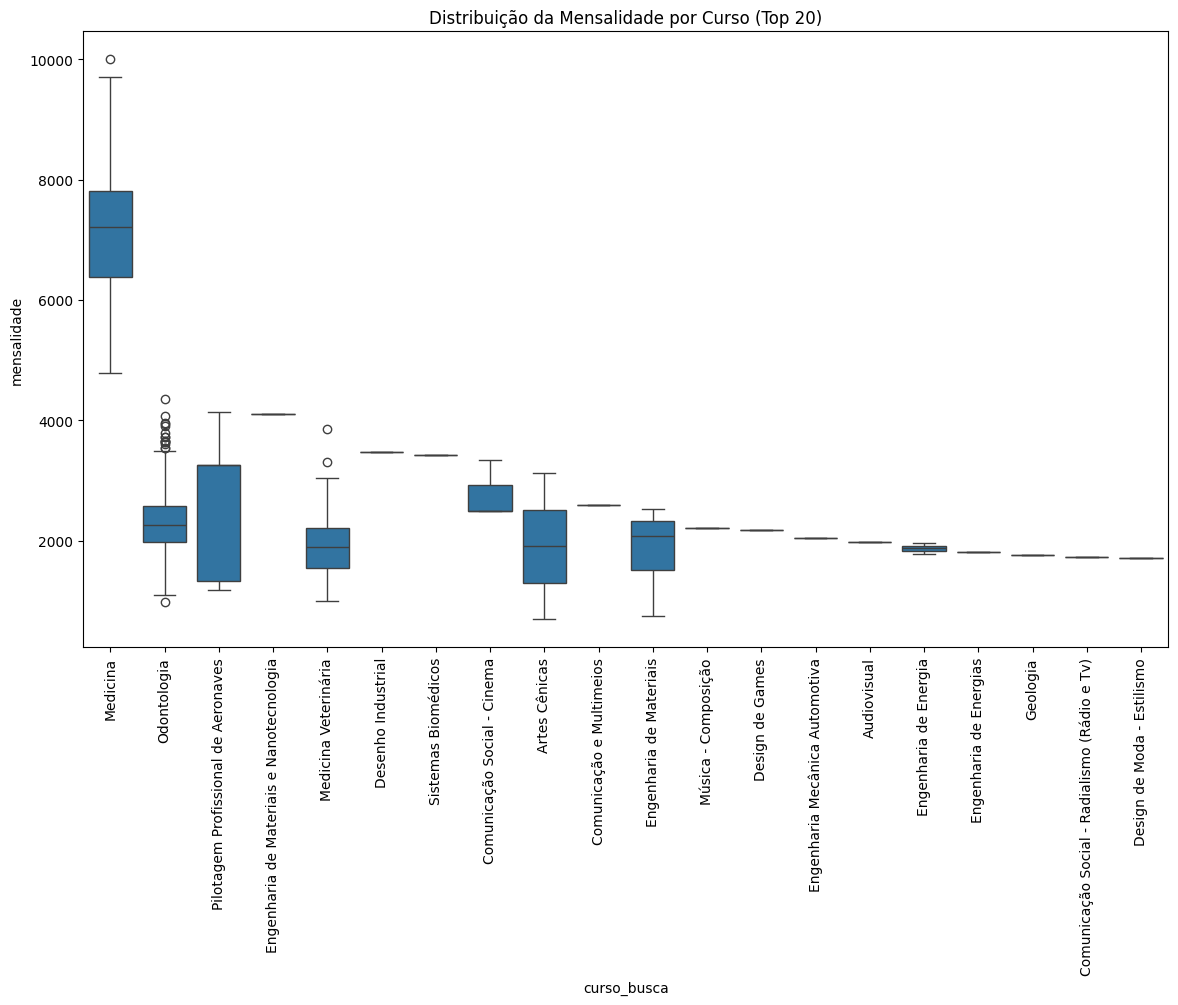

In [81]:
'''
    Analisando os 20 cursos com a mensalidade mais alta, conseguimos notar que medicina é o curso com a mensalidade mais elevada, dentre todos os outros, desparadamente
'''
# Agrupar cursos e calcular a mensalidade média
top_courses = df_prouni.groupby('curso_busca')['mensalidade'].mean().sort_values(ascending=False).head(20)

# Filtrar o dataframe para os cursos mais comuns
df_top_courses = df_prouni[df_prouni['curso_busca'].isin(top_courses.index)]

# Criar o gráfico boxplot para os 20 cursos mais comuns
plt.figure(figsize=(14, 8))
sns.boxplot(x='curso_busca', y='mensalidade', data=df_top_courses)
plt.title('Distribuição da Mensalidade por Curso (Top 20)')
plt.xticks(rotation=90)
plt.show()


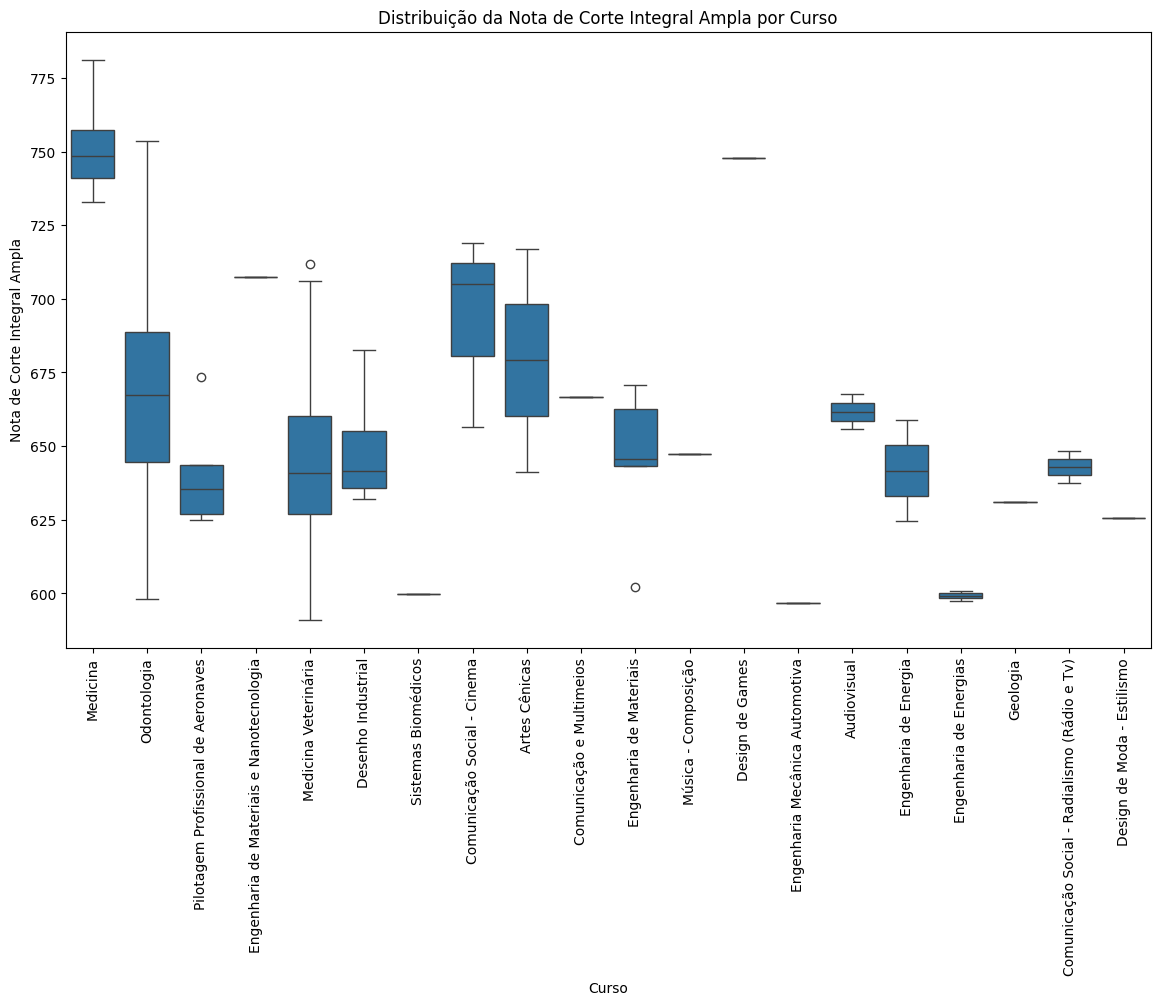

In [82]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='curso_busca', y='nota_integral_ampla', data=df_top_courses)
plt.title('Distribuição da Nota de Corte Integral Ampla por Curso')
plt.xticks(rotation=90)
plt.xlabel('Curso')
plt.ylabel('Nota de Corte Integral Ampla')
plt.show()


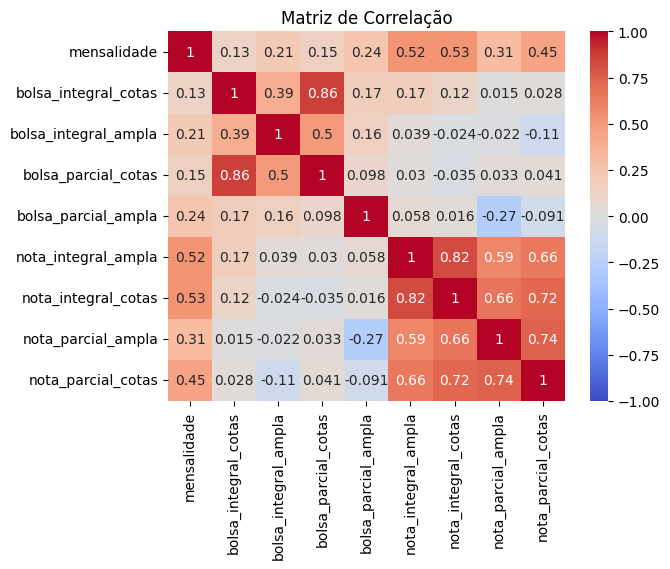

In [83]:
# Matriz de correlação
corr = df_prouni[['mensalidade', 'bolsa_integral_cotas', 'bolsa_integral_ampla', 'bolsa_parcial_cotas' , 'bolsa_parcial_ampla', 'nota_integral_ampla', 'nota_integral_cotas', 'nota_parcial_ampla', 'nota_parcial_cotas']].corr()

# Heatmap de correlação
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()


In [104]:
df_prouni_data = df_prouni[['grau', 'turno', 'mensalidade', 'bolsa_integral_cotas', 'bolsa_integral_ampla', 'bolsa_parcial_cotas', 'bolsa_parcial_ampla', 'curso_busca', 'cidade_busca', 'uf_busca', 'universidade_nome', 'nota_integral_ampla', 'nota_integral_cotas', 'nota_parcial_ampla', 'nota_parcial_cotas']].copy()

# Substituir NaN por 0 na coluna 'bolsa_integral_cotas'
for col in ['bolsa_integral_cotas', 'bolsa_integral_ampla', 'bolsa_parcial_cotas', 'bolsa_parcial_ampla']:  
    df_prouni_data[col] = df_prouni_data[col].fillna(0).astype(int)

for col in ['nota_integral_ampla', 'nota_integral_cotas', 'nota_parcial_ampla', 'nota_parcial_cotas']:  
    df_prouni_data[col] = df_prouni_data[col].fillna(0.0)

In [105]:
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df_prouni_data[['grau', 'turno', 'curso_busca', 'cidade_busca', 'uf_busca', 'universidade_nome']])
encoded_features_dense = encoded_features.toarray()
encoded_df = pd.DataFrame(encoded_features_dense, columns=encoder.get_feature_names_out(['grau', 'turno', 'curso_busca', 'cidade_busca', 'uf_busca', 'universidade_nome']))
df_prouni_data = pd.concat([df_prouni_data, encoded_df], axis=1)

df_prouni_data.drop(['grau', 'turno', 'curso_busca', 'cidade_busca', 'uf_busca', 'universidade_nome'], axis=1, inplace=True)

In [114]:
X = df_prouni_data.drop('mensalidade', axis=1)
y = df_prouni_data['mensalidade']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
corr_matrix = X_train.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()


: 